In [197]:
import pandas as pd
import json
import glob
from collections import Counter
from typing import List, Dict
from collections import OrderedDict
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
statistic_dir = "../data/statistics/"

In [198]:
def df_to_latex(df: pd.DataFrame) -> None:
    print(df.to_latex(index=False))

def get_module(name, data):
    module = next(filter(lambda x: name == x["name"], data))
    return module

with open("../data/statistic_files_per_year.json", "r", encoding="utf-8") as src:
    data = json.load(src)
    #print(len(data))
    #data = data[8:]

    #for item in data:
    #    print(item["year"])

In [199]:
def create_plot(name, year, value_a, value_b) -> str:
    
    import plot_likert
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt

    font = {'family' : 'normal',
            'weight' : 'bold',
            'size'   : 22}

    plt.rc('font', **font)

    values = [(value_a, value_b)] #, (100, 0), (0,100), (26.5, 73.5), (8.3, 91.7), (22, 78), (16.3, 83.7)]

    values = [(round(x[0]*100), round(x[1]*100)) for x in values]
    columns = [f"({value_a}, {value_b})"] # , "(100, 0)", "(0,100)", "(26.5, 73.5)","(8.3, 91.7)", "(22, 78)","(16.3, 83.7)"]

    data = {} 

    for i, col_name in enumerate(columns):
        data[col_name] = ["Strongly disagree"] * values[i][0] +  ["Strongly agree"] * values[i][1]

    data = pd.DataFrame(data)



    rng = np.random.default_rng(seed=42)
    #data = pd.DataFrame(rng.choice(plot_likert.scales.agree, (10,2)), columns=['Q1','Q2'])
    ax = plot_likert.plot_likert(data, plot_likert.scales.agree, plot_percentage=False, label= "(100, 0) to (0, 100)",
                            bar_labels=True, colors=['#ffffff00', '#d8a539', '#efe0c1', 'lightgray', '#bde1dd', '#5ab4ac'], figsize=(8,4), xticks = [-100, -50, 0,50,100], bar_labels_color="black")

    # Remove the x and y axis 
    plt.axis('off')
    #ax.text(-2000, -0.1, f'{round(value_a * 100), 1}',)
    #ax.text(11000, -0.1, f'{round(value_a * 100), 1}',)
    plt.legend('',frameon=False)

    file_path = f'../data/{name}/{name}_{year}.png'

    plt.savefig(file_path, bbox_inches='tight', pad_inches=0)

    return file_path


In [200]:
def count_ml_method_params(library_name: str, library_dir: str, files: str, year: int) -> pd.DataFrame:

    with open(library_dir, "r", encoding="utf-8") as library_file:
        library_data = json.load(library_file)
        class_names = [module["name"] for module in library_data]

    total_params_set = 0
    total_params_available = 0
    default_params = 0
    customized_params = 0

    for project in files:
        with open(statistic_dir + project, "r", encoding="utf-8") as project_file:
            project_data = json.load(project_file)

            for file in project_data.keys():
                file_data = project_data[file]
                for library in file_data.keys():
                    if library == library_name:
                        module_data = file_data[library]
                        for key, data in module_data.items():
                            if key[0].isupper():
                                class_name_parts = key.split("_")
                                if len(class_name_parts) > 2:
                                    class_name = "_".join(class_name_parts[:-1])
                                else:
                                    class_name = class_name_parts[0]
                                
                                if class_name not in class_names:
                                    continue

                                library_module_data = get_module(class_name, library_data)
                                library_module_params = library_module_data["params"]
                                total_params_available += len(library_module_params)

                                for name, value in data.items():
                                    if name in ("variable", "params"):
                                        continue
                                    else:
                                        total_params_set += 1
                                        if name in library_module_params.keys():

                                            if str(library_module_params[name]).replace("'", "") == value["value"]:
                                                default_params += 1
                                            else:
                                                customized_params += 1
                                        else:
                                            customized_params += 1


    assert total_params_set == default_params + customized_params


    df = pd.DataFrame()
    df["Year"] = [year]
    df["Paper Count"] = [len(files)]
    df["Available"] = [total_params_available]
    df["Set"] = [total_params_set]

    if total_params_set > 0:
        default_per = round(default_params/total_params_set, 1)
        custom_per = round(customized_params/total_params_set, 1)
        file_path = create_plot(name=library_name, year=str(year), value_a=default_per, value_b=custom_per)
        df["Default vs. Custom"] = [f"\includegraphics[scale=0.1]{file_path}"]
   
    else:
        df["Default vs. Custom"] = ["-"]

    return df


# Count params of ML methods across the code repositories for which the respective paper reported hyperparameter tuning
with open("../data/repos_hyperparameter_tuning.json", "r", encoding="utf-8") as src:
    repos_files = json.load(src)

#df_sklearn = count_ml_method_params("sklearn", "../data/library_data/sklearn_estimators.json" , repos_files)#
#df_tf = count_ml_method_params("tensorflow", "../data/library_data/tensorflow_optimizer.json" , repos_files)
#df_pytorch = count_ml_method_params("torch", "../data/library_data/torch_optimizer.json" , repos_files)
#df_all = pd.concat([df_sklearn, df_tf, df_pytorch])

#df_to_latex(df_all)

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

\begin{tabular}{rrrrrrl}
\toprule
 Year &  Paper Count &  Available &  Set &  Default &  Custom &                                 Default vs. Custom \\
\midrule
 1994 &            0 &          0 &    0 &      0.0 &     0.0 &                                                NaN \\
 2002 &            0 &          0 &    0 &      0.0 &     0.0 &                                                NaN \\
 2009 &            0 &          0 &    0 &      0.0 &     0.0 &                                                NaN \\
 2010 &            0 &          0 &    0 &      0.0 &     0.0 &                                                NaN \\
 2011 &            1 &         90 &    6 &      NaN &     NaN & \textbackslash includegraphics[scale=0.1]../data/sklearn/skle... \\
 2012 &            0 &          0 &    0 &      0.0 &     0.0 &                                                NaN \\
 2013 &            1 &          0 &    0 &      NaN &     NaN &                                                  - \\

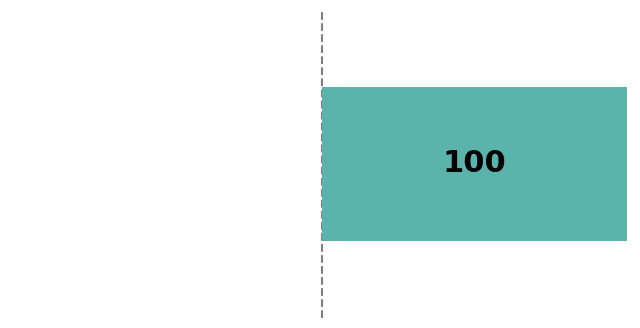

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.


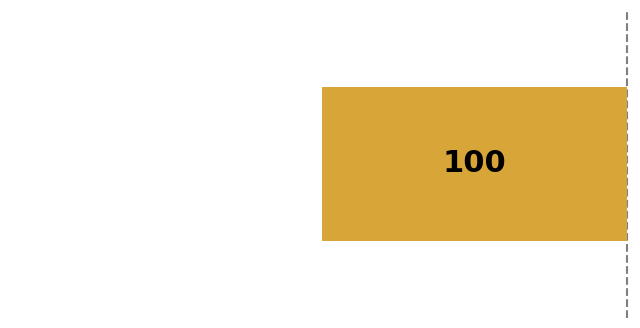

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.


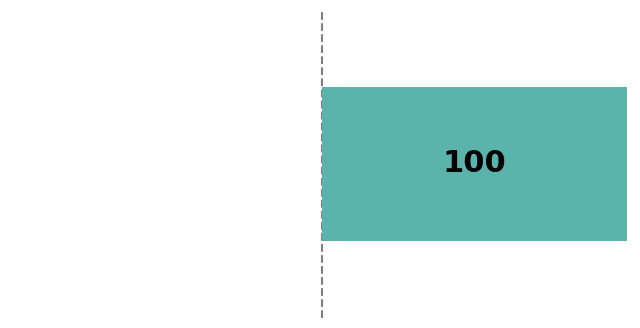

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.


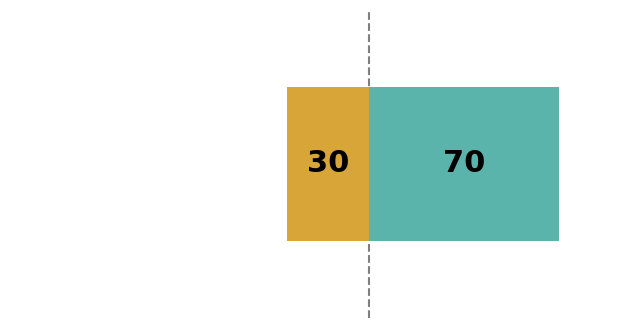

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.


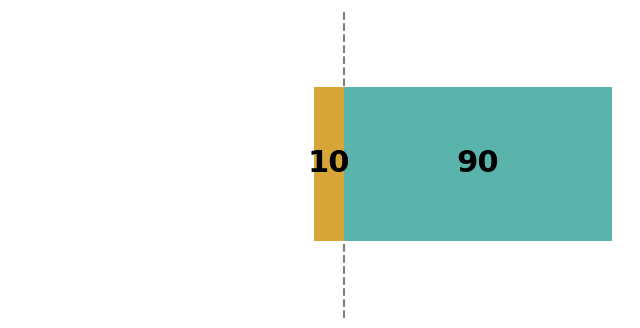

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.


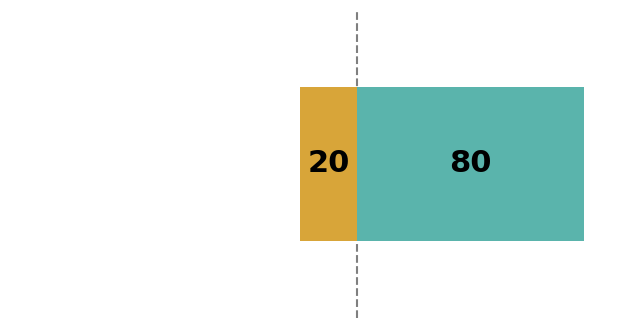

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.


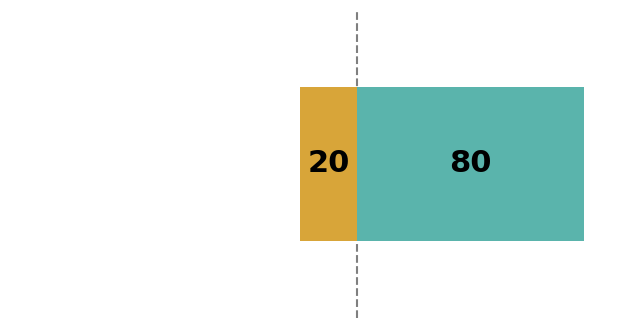

In [201]:
def get_hp_tuning_stats_per_year(data: List, library_name: str, library_dir: str):
    dfs = []

    for item in data:
        files = item["hp_yes"]

        if not files:
            df = pd.DataFrame()
            df["Year"] = [item["year"]]
            df["Paper Count"] = [len(files)]
            df["Available"] = [0]
            df["Set"] = [0]
            df["Default"] = [0]
            df["Custom"] = [0]
            dfs.append(df)
            continue

        df = count_ml_method_params(library_name=library_name, library_dir=library_dir, files=files, year=item["year"])
        dfs.append(df)
    
    df_all = pd.concat(dfs)
    return df_all

df_sklearn = get_hp_tuning_stats_per_year(data, "sklearn", "../data/library_data/sklearn_estimators.json")
#df_tf = get_hp_tuning_stats_per_year(data, "tensorflow", "../data/library_data/tensorflow_optimizer.json")
#df_torch = get_hp_tuning_stats_per_year(data, "torch", "../data/library_data/torch_optimizer.json")
            
df_to_latex(df_sklearn)
#df_to_latex(df_tf)
#df_to_latex(df_torch)


In [202]:
def get_final_hp_values_stats_per_year(data: List, library_name: str, library_dir: str):
    dfs = []

    for item in data:
        files = item["fv_yes"]

        if not files:
            df = pd.DataFrame()
            df["Year"] = [item["year"]]
            df["Paper Count"] = [len(files)]
            df["Available"] = [0]
            df["Set"] = [0]
            df["Default"] = [0]
            df["Custom"] = [0]
            dfs.append(df)
            continue

        df = count_ml_method_params(library_name=library_name, library_dir=library_dir, files=files, year=item["year"])
        dfs.append(df)
    
    df_all = pd.concat(dfs)
    return df_all

#df_sklearn = get_hp_tuning_stats_per_year(data, "sklearn", "../data/library_data/sklearn_estimators.json")
#df_tf = get_hp_tuning_stats_per_year(data, "tensorflow", "../data/library_data/tensorflow_optimizer.json")
#df_torch = get_hp_tuning_stats_per_year(data, "torch", "../data/library_data/torch_optimizer.json")
#            
#df_to_latex(df_sklearn)
#df_to_latex(df_tf)
#df_to_latex(df_torch)


In [203]:
def count_ml_method_params(library_name: str, library_dir: str, files: str) -> pd.DataFrame:

    with open(library_dir, "r", encoding="utf-8") as library_file:
        library_data = json.load(library_file)
        class_names = [module["name"] for module in library_data]

    total_params_set = 0
    total_params_available = 0
    default_params = 0
    customized_params = 0

    for project in files:
        with open(statistic_dir + project, "r", encoding="utf-8") as project_file:
            project_data = json.load(project_file)

            for file in project_data.keys():
                file_data = project_data[file]
                for library in file_data.keys():
                    if library == library_name:
                        module_data = file_data[library]
                        for key, data in module_data.items():
                            if key[0].isupper():
                                class_name_parts = key.split("_")
                                if len(class_name_parts) > 2:
                                    class_name = "_".join(class_name_parts[:-1])
                                else:
                                    class_name = class_name_parts[0]
                                
                                if class_name not in class_names:
                                    continue

                                library_module_data = get_module(class_name, library_data)
                                library_module_params = library_module_data["params"]
                                total_params_available += len(library_module_params)

                                for name, value in data.items():
                                    if name in ("variable", "params"):
                                        continue
                                    else:
                                        total_params_set += 1
                                        if name in library_module_params.keys():

                                            if str(library_module_params[name]).replace("'", "") == value["value"]:
                                                default_params += 1
                                            else:
                                                customized_params += 1
                                        else:
                                            customized_params += 1


    assert total_params_set == default_params + customized_params

    return total_params_available, total_params_set, default_params, customized_params

In [204]:
def get_hp_tuning_stats_per_year(data):
    dfs = []
    for item in data:
        total_parameter = 0
        actually_set = 0
        default = 0
        customized = 0
        files = item["hp_yes"]
        year = item["year"]


        if not files:
            total_parameter += 0
            actually_set += 0 
            default += 0
            customized += 0
        else:
            sklearn_total, sklearn_set, sklearn_def, sklearn_cus = count_ml_method_params("sklearn", "../data/library_data/sklearn_estimators.json", files=files)
            tf_total, tf_set, tf_def, tf_cus = count_ml_method_params("tensorflow", "../data/library_data/tensorflow_optimizer.json", files=files)
            torch_total, torch_set, torch_def, torch_cus = count_ml_method_params("torch", "../data/library_data/torch_optimizer.json", files=files)

            total_parameter += sklearn_total + tf_total + torch_total
            actually_set += sklearn_set + tf_set + torch_set
            default += sklearn_def + tf_def + torch_def
            customized += sklearn_cus + tf_cus + torch_cus


        df = pd.DataFrame()
        df["Year"] = [item["year"]]
        df["Paper Count"] = [len(files)]
        df["Available"] = [total_parameter]
        df["Set"] = [actually_set]
        df["Default"] = [default]
        df["Custom"] = [customized]    
        dfs.append(df)

    df_all = pd.concat(dfs)
    return df_all

df_all = get_hp_tuning_stats_per_year(data)

#df_sklearn = get_hp_tuning_stats_per_year(data, "sklearn", "../data/library_data/sklearn_estimators.json")
#df_tf = get_hp_tuning_stats_per_year(data, "tensorflow", "../data/library_data/tensorflow_optimizer.json")
#df_torch = get_hp_tuning_stats_per_year(data, "torch", "../data/library_data/torch_optimizer.json")
            
df_to_latex(df_all)

\begin{tabular}{rrrrrr}
\toprule
 Year &  Paper Count &  Available &  Set &  Default &  Custom \\
\midrule
 1994 &            0 &          0 &    0 &        0 &       0 \\
 2002 &            0 &          0 &    0 &        0 &       0 \\
 2009 &            0 &          0 &    0 &        0 &       0 \\
 2010 &            0 &          0 &    0 &        0 &       0 \\
 2011 &            1 &         90 &    6 &        0 &       6 \\
 2012 &            0 &          0 &    0 &        0 &       0 \\
 2013 &            1 &         14 &    1 &        0 &       1 \\
 2014 &            7 &        175 &   45 &        0 &      45 \\
 2015 &           10 &         96 &   26 &        3 &      23 \\
 2016 &           20 &        165 &   21 &        2 &      19 \\
 2017 &           27 &        527 &  115 &        2 &     113 \\
 2018 &           79 &       2025 &  538 &       74 &     464 \\
 2019 &          103 &       3506 &  893 &      213 &     680 \\
 2020 &          162 &       4625 & 1074 &      

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

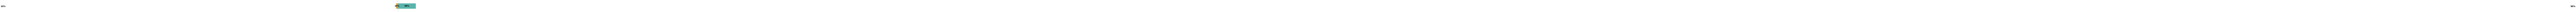

In [205]:
import plot_likert
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

font = {'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)

values = [(10, 90)] #, (100, 0), (0,100), (26.5, 73.5), (8.3, 91.7), (22, 78), (16.3, 83.7)]

values = [(round(x[0]*100), round(x[1]*100)) for x in values]
columns = ["(0, 100)"] # , "(100, 0)", "(0,100)", "(26.5, 73.5)","(8.3, 91.7)", "(22, 78)","(16.3, 83.7)"]

data = {} 

for i, col_name in enumerate(columns):
    data[col_name] = ["Strongly disagree"] * values[i][0] +  ["Strongly agree"] * values[i][1]

data = pd.DataFrame(data)


ax = plot_likert.plot_likert(data, plot_likert.scales.agree, plot_percentage=True, label= "(100, 0) to (0, 100)",
                            bar_labels=True, colors=['#ffffff00', '#d8a539', '#efe0c1', 'lightgray', '#bde1dd', '#5ab4ac'], figsize=(8,2), xticks = [-100, -50, 0,50,100], bar_labels_color="black", )                     

# Remove the x and y axis 
plt.axis('off')
ax.text(-2000, -0.1, '10%',)
ax.text(11000, -0.1, '90%',)
plt.legend('',frameon=False)
plt.grid(visible=False)

plt.savefig('likert.png', bbox_inches='tight', pad_inches=0)